# To get access to the dataset:
- If you already have the folder with the datasets, you might need to 'git pull' to ensure that it is updated
> Else, clone repo using the command below <br>
> "git clone https://github.com/clemnyan/ENGS_108_Fall_2021.git" <br>


## **Problem 2: Introduction to TensorFlow**
In this problem, we will start working in tensorflow to build deep learning systems starting with fully connected neural networks. We will focus on using the food image dataset we built in the last problem.
>
> **(a)** Using the food image dataset we built in the last problem (last week's assignment!), build a [tensorflow Data Dataset](https://www.tensorflow.org/api_docs/python/tf/data/Dataset) that is shuffled with a batch size of 10. 

Found 978 files belonging to 9 classes.
num total points: 978
num train points: 736
num validation points: 242


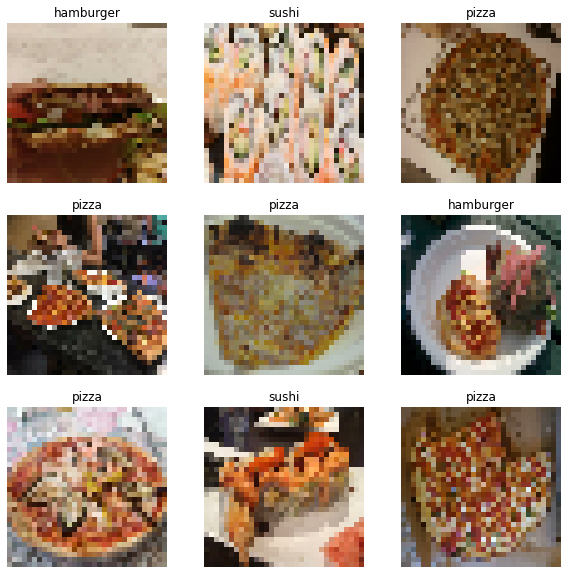

In [43]:
#Code and explanation for 2a
from PIL import Image
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

#tf.disable_v2_behavior() 

working_dir = "datasets/"

folder = os.path.join(working_dir, 'ExampleFoodImageDataset')

batch_size=32
DATASET_SIZE = 978
img_height = 32
img_width = 32
num_classes = 9



all_data = tf.keras.utils.image_dataset_from_directory(
  str(folder),
  seed=123,
  image_size=(img_height, img_width),
  batch_size = batch_size,
  label_mode="categorical"
    
)

class_names = all_data.class_names

# Now we shuffle the dataset, and show the results for the first 9 elements
# without the line below, the  code will return different set of the first 9 images
#all_data = all_data.shuffle(10)


################ utility functions

def get_count(dataset1): 
    count=0
    for images, _ in dataset1:
      for i in images:
        count = count+1
    return count

#############


# plot assortment of positive and negative labels
plt.figure(figsize=(10, 10))
#get first batch of data
for images, labels in all_data.take(1):
  #get first 9 entries in batch
  for i in range(9):
    label = int(np.where(labels[i]>0)[0])
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[label])
    plt.axis("off")


# out of a total of 31 batches, take first 27 for training, 3 for validation, and 1 for test
train_size = 23
val_size = 8
#test_size = 1

train_dataset = all_data.take(train_size)
val_dataset = all_data.skip(train_size)
val_dataset = val_dataset.take(val_size)

print("num total points: " + str(get_count(all_data)))
print("num train points: " + str(get_count(train_dataset)))
print("num validation points: " + str(get_count(val_dataset)))
#print("num test points: " + str(get_count(test_dataset)))

> **(b)** Build a two layer fully connected neural network of any size with a ReLu activation function and a final softmax layer.

In [47]:

model = tf.keras.Sequential([
  layers.Dense(8, activation='relu'),
  layers.Dense(4, activation='relu'),
  layers.Flatten(),
  layers.Dense(9, activation = 'softmax')
])


The above code first defines the layers of the model, including an initial layer for rescaling to be in (-1,1), as two dense layers with relu activation, a flattening layer that I found necessary to get rid of errors regarding compatibility of the input and output, and finally a softmax layer of size 9 (one for each class). The input is hot-1 encoded, and the output variable will also be 9-dimensional, with one output for each class in the dataset. 


> **(c)** Compile your model with an appropriate loss function and optimizer. Briefly describe your choices.

In [48]:
# Code and explanation 

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



Above is where I compile the model. The loss being used is the cross-entropy loss, which is the recommended loss for categorical variables with a one-hot encoding, according to the keras documentation. plus a regularization term that penalizes large bias terms. The optimizer is ADAM (Adaptive Moment Estimation), which (according to wikipedia) takes the best parts of previous optimization algorithms such as the Adaptive Gradient Algorithm (AdaGrad) that maintains a per-parameter learning rate that improves performance on problems with sparse gradients , and Root Mean Square Propagation (RMSProp) that also maintains per-parameter learning rates that are adapted based on the average of recent magnitudes of the gradients for the weight (e.g. how quickly it is changing). 

> **(d)** Train your model on the food image training dataset. And report your accuracy on the testing dataset.

In [50]:
epochs = 100
history=model.fit(train_dataset,validation_data=val_dataset, epochs=epochs)

model.summary()


Epoch 1/100
23/23 [==============================] - 2s 90ms/step - loss: 38.4207 - accuracy: 0.3818 - val_loss: 42.2640 - val_accuracy: 0.3017
Epoch 2/100
23/23 [==============================] - 2s 86ms/step - loss: 39.5933 - accuracy: 0.3750 - val_loss: 45.8414 - val_accuracy: 0.3471
Epoch 3/100
23/23 [==============================] - 2s 89ms/step - loss: 27.8614 - accuracy: 0.4117 - val_loss: 34.1642 - val_accuracy: 0.3264
Epoch 4/100
23/23 [==============================] - 2s 87ms/step - loss: 22.0873 - accuracy: 0.4633 - val_loss: 31.5778 - val_accuracy: 0.3554
Epoch 5/100
23/23 [==============================] - 2s 90ms/step - loss: 26.8241 - accuracy: 0.4742 - val_loss: 35.3069 - val_accuracy: 0.3512
Epoch 6/100
23/23 [==============================] - 2s 86ms/step - loss: 25.7581 - accuracy: 0.4457 - val_loss: 22.4949 - val_accuracy: 0.4835
Epoch 7/100
23/23 [==============================] - 2s 85ms/step - loss: 17.9866 - accuracy: 0.5476 - val_loss: 33.9481 - val_accuracy:

23/23 [==============================] - 2s 94ms/step - loss: 0.1983 - accuracy: 0.9688 - val_loss: 1.3928 - val_accuracy: 0.8760
Epoch 59/100
23/23 [==============================] - 2s 94ms/step - loss: 0.2525 - accuracy: 0.9579 - val_loss: 1.3936 - val_accuracy: 0.8678
Epoch 60/100
23/23 [==============================] - 2s 93ms/step - loss: 0.2193 - accuracy: 0.9565 - val_loss: 1.1029 - val_accuracy: 0.8595
Epoch 61/100
23/23 [==============================] - 2s 92ms/step - loss: 0.5425 - accuracy: 0.9049 - val_loss: 0.8997 - val_accuracy: 0.8843
Epoch 62/100
23/23 [==============================] - 2s 95ms/step - loss: 0.1998 - accuracy: 0.9565 - val_loss: 1.2111 - val_accuracy: 0.8636
Epoch 63/100
23/23 [==============================] - 2s 94ms/step - loss: 0.2329 - accuracy: 0.9538 - val_loss: 0.7877 - val_accuracy: 0.9132
Epoch 64/100
23/23 [==============================] - 2s 94ms/step - loss: 0.2060 - accuracy: 0.9538 - val_loss: 0.9201 - val_accuracy: 0.9174
Epoch 65/100

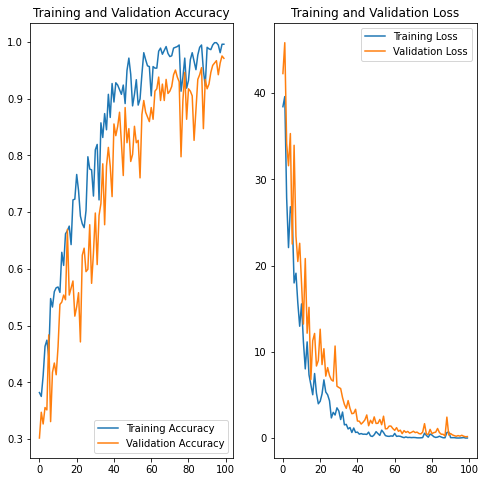

In [51]:
#define function for plotting train and test accuracy
def show_plots(history_obj):
    acc = history_obj.history['accuracy']
    val_acc = history_obj.history['val_accuracy']

    loss = history_obj.history['loss']
    val_loss = history_obj.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

show_plots(history)

The model appears to be performing well for being so small. I am using hidden layer sizes of 8 and then 4, with a resultant validation accuracy of ~97% after 100 epochs of training. There is apparently not much overfitting happening, as the train and test accuracies stay pretty tight for all epochs. 

> **(e)** Now try to tune this network by varying the number of layers, units, activations and see if you can outperform the network in part (d). Does your best model perform better or worse than the SVM in problem 1?

# Code and explanation
I tried increasing the size of the hidden layers from (8,4) to (64,32). My expectation is that the training accuracy would jump to almost 100%, but that the validation accuracy would remain low due to overfitting. While I was right that the training accuracy was very high, I was surprised to see that the validation accuracy was roughly in line with it, at 99.6% after 50 epochs (!). This means that overfitting is not apparently a major problem, even so many parameters and without the use of any dropout layer. This is strange to me. 

Epoch 1/50
23/23 [==============================] - 3s 106ms/step - loss: 157.3338 - accuracy: 0.2038 - val_loss: 37.6306 - val_accuracy: 0.2355
Epoch 2/50
23/23 [==============================] - 2s 98ms/step - loss: 11.9653 - accuracy: 0.3533 - val_loss: 2.8632 - val_accuracy: 0.3967
Epoch 3/50
23/23 [==============================] - 3s 102ms/step - loss: 1.7163 - accuracy: 0.4878 - val_loss: 1.7657 - val_accuracy: 0.4587
Epoch 4/50
23/23 [==============================] - 2s 97ms/step - loss: 1.0199 - accuracy: 0.6549 - val_loss: 1.3830 - val_accuracy: 0.5826
Epoch 5/50
23/23 [==============================] - 2s 96ms/step - loss: 0.8122 - accuracy: 0.7514 - val_loss: 1.1466 - val_accuracy: 0.6818
Epoch 6/50
23/23 [==============================] - 2s 101ms/step - loss: 0.6549 - accuracy: 0.8261 - val_loss: 1.0169 - val_accuracy: 0.7355
Epoch 7/50
23/23 [==============================] - 3s 104ms/step - loss: 0.4943 - accuracy: 0.8709 - val_loss: 0.8435 - val_accuracy: 0.8017
Epoch

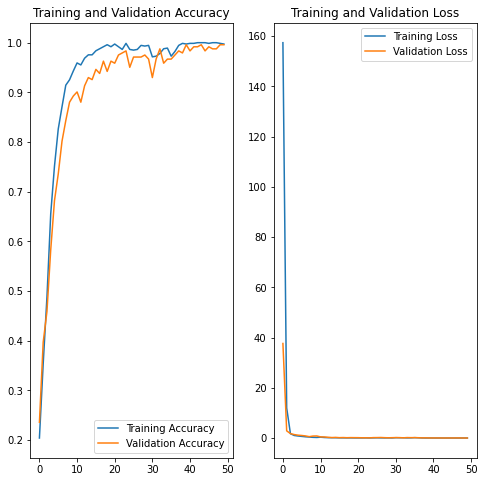

In [53]:

model = tf.keras.Sequential([
  layers.Dense(64, activation='relu'),
  layers.Dense(32, activation='relu'),
  layers.Flatten(),
  layers.Dense(9, activation = 'softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

epochs = 50
history2=model.fit(train_dataset,validation_data=val_dataset, epochs=epochs)

model.summary()

show_plots(history2)

> **(BONUS)** We lost a lot of information when we resized the images in part (a). What would happen if we didn't resize the images and we built fit the neural network with all this other information? Try it out! *Hint: Runtime will be much longer, both to create the image dataset without resizing and to train the model, so you might have to get the code working and then just let it run.*

Now I will try rebuilding the dataset again, without resizing this time. After looking at the keras docs, it appears that not including a resizing option defaults to resizing to (256x256). While this doesn't fit the exact description of the question, it should still test the performance of the model when each dimension of the image is at least an order of magnitude more information. Images with the higher resolution are shown in the output below for comparison -- we can see it has a mich higher sharpness than the 32x32 case. I tested the results with the smaller size of the network -- i.e. with hidden layers of size 8 and 4. The result was that the neural network performed roughly the same as the base case of images sized 32x32: it acheived a validation accuracy of ~98%. We may conclude from this that most of the important features are already encoded in the 32x32 resolution we started with.

Found 978 files belonging to 9 classes.
Epoch 1/100
23/23 [==============================] - 5s 192ms/step - loss: 8256.5273 - accuracy: 0.1834 - val_loss: 5158.5083 - val_accuracy: 0.4050
Epoch 2/100
23/23 [==============================] - 4s 187ms/step - loss: 2594.9233 - accuracy: 0.3519 - val_loss: 1402.7506 - val_accuracy: 0.3884
Epoch 3/100
23/23 [==============================] - 4s 183ms/step - loss: 808.5634 - accuracy: 0.4090 - val_loss: 524.3318 - val_accuracy: 0.3554
Epoch 4/100
23/23 [==============================] - 5s 188ms/step - loss: 367.2635 - accuracy: 0.4674 - val_loss: 452.1897 - val_accuracy: 0.4256
Epoch 5/100
23/23 [==============================] - 4s 178ms/step - loss: 397.6290 - accuracy: 0.4742 - val_loss: 542.7631 - val_accuracy: 0.3802
Epoch 6/100
23/23 [==============================] - 4s 184ms/step - loss: 456.6223 - accuracy: 0.4864 - val_loss: 436.2941 - val_accuracy: 0.4174
Epoch 7/100
23/23 [==============================] - 4s 180ms/step - loss:

Epoch 57/100
23/23 [==============================] - 4s 182ms/step - loss: 3.5681 - accuracy: 0.9592 - val_loss: 12.4039 - val_accuracy: 0.9298
Epoch 58/100
23/23 [==============================] - 4s 183ms/step - loss: 2.3461 - accuracy: 0.9755 - val_loss: 9.9180 - val_accuracy: 0.9587
Epoch 59/100
23/23 [==============================] - 4s 186ms/step - loss: 1.3904 - accuracy: 0.9851 - val_loss: 7.6586 - val_accuracy: 0.9628
Epoch 60/100
23/23 [==============================] - 4s 179ms/step - loss: 2.0187 - accuracy: 0.9851 - val_loss: 9.0881 - val_accuracy: 0.9545
Epoch 61/100
23/23 [==============================] - 4s 182ms/step - loss: 2.3700 - accuracy: 0.9810 - val_loss: 8.9882 - val_accuracy: 0.9504
Epoch 62/100
23/23 [==============================] - 4s 180ms/step - loss: 1.4851 - accuracy: 0.9837 - val_loss: 9.4282 - val_accuracy: 0.9215
Epoch 63/100
23/23 [==============================] - 4s 183ms/step - loss: 1.2853 - accuracy: 0.9851 - val_loss: 10.3751 - val_accurac

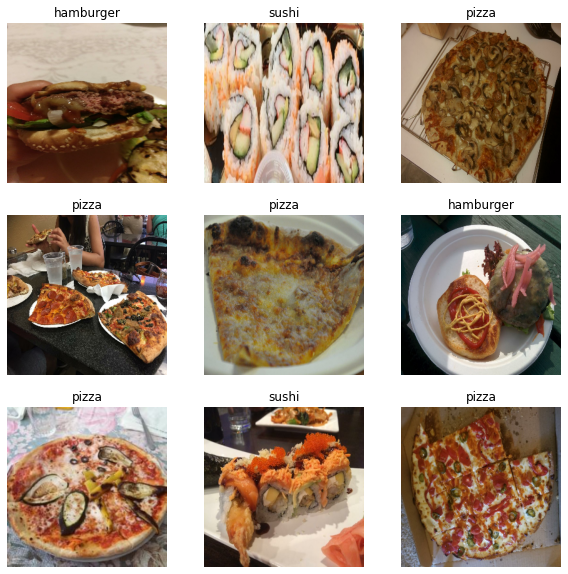

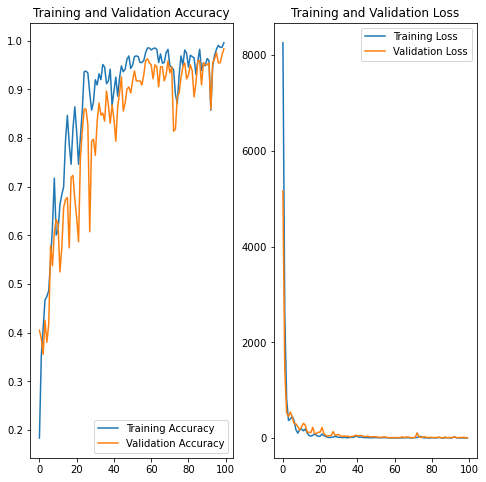

In [54]:
# Code and explanation


all_data = tf.keras.utils.image_dataset_from_directory(
  str(folder),
  seed=123,
  batch_size = batch_size,
  label_mode="categorical"
)

class_names = all_data.class_names

# plot assortment of positive and negative labels
plt.figure(figsize=(10, 10))
#get first batch of data
for images, labels in all_data.take(1):
  #get first 9 entries in batch
  for i in range(9):
    label = int(np.where(labels[i]>0)[0])
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[label])
    plt.axis("off")


train_size = 23
val_size = 8

train_dataset = all_data.take(train_size)
val_dataset = all_data.skip(train_size)
val_dataset = val_dataset.take(val_size)

model = tf.keras.Sequential([
  layers.Dense(8, activation='relu'),
  layers.Dense(4, activation='relu'),
  layers.Flatten(),
  layers.Dense(9, activation = 'softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

epochs = 100
history3=model.fit(train_dataset,validation_data=val_dataset, epochs=epochs)

model.summary()

show_plots(history3)

> **(BONUS)** Implement and explain other feature engineering (and data augmentation) techniques that we can perform to increase prediction accuracy? 

I tried adding a data augmentation step using the built-in features of keras to do this in a sequential layer at the beginning of the model. I ran the experiment again using the smaller size of the hidden layers, and with the original image sizes. Strangely, the model performed much worse than before. I assume this is because the model was not able to separate the dataset as well when rotations, scalings, and flips were included in the dataset. Which is strange, given that the images already should have included some of these kinds of augmentations in it already (in the sense that not all images of the food were at the same angle, size, or orientation). 

Found 978 files belonging to 9 classes.
Epoch 1/100
23/23 [==============================] - 3s 90ms/step - loss: 41.9445 - accuracy: 0.2160 - val_loss: 27.7592 - val_accuracy: 0.1901
Epoch 2/100
23/23 [==============================] - 2s 82ms/step - loss: 21.3462 - accuracy: 0.2677 - val_loss: 13.1189 - val_accuracy: 0.2603
Epoch 3/100
23/23 [==============================] - 2s 85ms/step - loss: 12.2288 - accuracy: 0.2378 - val_loss: 9.9006 - val_accuracy: 0.2355
Epoch 4/100
23/23 [==============================] - 2s 84ms/step - loss: 7.6933 - accuracy: 0.2459 - val_loss: 8.6710 - val_accuracy: 0.2479
Epoch 5/100
23/23 [==============================] - 2s 81ms/step - loss: 6.6955 - accuracy: 0.2609 - val_loss: 9.6905 - val_accuracy: 0.2397
Epoch 6/100
23/23 [==============================] - 2s 82ms/step - loss: 5.7377 - accuracy: 0.2894 - val_loss: 6.8622 - val_accuracy: 0.2149
Epoch 7/100
23/23 [==============================] - 2s 84ms/step - loss: 4.8712 - accuracy: 0.2853 - v

23/23 [==============================] - 2s 88ms/step - loss: 1.6215 - accuracy: 0.4103 - val_loss: 1.6974 - val_accuracy: 0.4215
Epoch 59/100
23/23 [==============================] - 2s 90ms/step - loss: 1.5610 - accuracy: 0.4130 - val_loss: 1.6902 - val_accuracy: 0.3884
Epoch 60/100
23/23 [==============================] - 2s 89ms/step - loss: 1.5198 - accuracy: 0.4307 - val_loss: 1.7641 - val_accuracy: 0.3884
Epoch 61/100
23/23 [==============================] - 2s 88ms/step - loss: 1.5653 - accuracy: 0.4049 - val_loss: 1.8565 - val_accuracy: 0.3347
Epoch 62/100
23/23 [==============================] - 2s 88ms/step - loss: 1.5546 - accuracy: 0.4185 - val_loss: 1.7295 - val_accuracy: 0.3884
Epoch 63/100
23/23 [==============================] - 2s 92ms/step - loss: 1.5332 - accuracy: 0.4307 - val_loss: 1.7000 - val_accuracy: 0.3719
Epoch 64/100
23/23 [==============================] - 2s 90ms/step - loss: 1.5143 - accuracy: 0.4239 - val_loss: 1.8146 - val_accuracy: 0.3926
Epoch 65/100

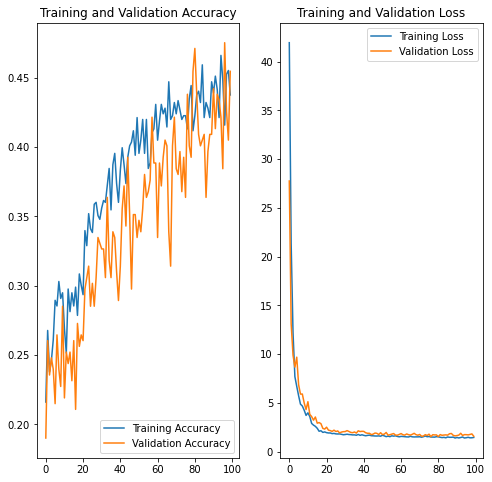

In [56]:
# Code and explanation

all_data = tf.keras.utils.image_dataset_from_directory(
  str(folder),
  seed=123,
  batch_size = batch_size,
  image_size=(img_height, img_width),
  label_mode="categorical"
)

class_names = all_data.class_names

train_size = 23
val_size = 8

train_dataset = all_data.take(train_size)
val_dataset = all_data.skip(train_size)
val_dataset = val_dataset.take(val_size)


data_augmentation = tf.keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

model = tf.keras.Sequential([
  data_augmentation,
  layers.Dense(8, activation='relu'),
  layers.Dense(4, activation='relu'),
  layers.Flatten(),
  layers.Dense(9, activation = 'softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

epochs = 100
history3=model.fit(train_dataset,validation_data=val_dataset, epochs=epochs)

model.summary()

show_plots(history3)